<a href="https://colab.research.google.com/github/281096alif/BengalDeltaFish_dataset/blob/main/10_02_25_dip_project_bengalDeltaFish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Wed Nov 12 15:32:05 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLO11 via Ultralytics

In [3]:
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.4/112.6 GB disk)


## Fine-tune YOLO11 on  dataset

In [4]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


from google.colab import userdata

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="lniyaAIMaVl7Cx3O8ICi")
project = rf.workspace("rakib151p").project("vegmining-i6j82")
version = project.version(6)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to VegMining-6 in yolov11:: 100%|██████████| 9584/9584 [00:01<00:00, 8169.28it/s]


## Custom Training

In [5]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=50 imgsz=640 plots=True

/content
100% 18.4M/18.4M [00:00<00:00, 202MB/s]
New https://pypi.org/project/ultralytics/8.3.228 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/datasets/VegMining-6/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [6]:
!ls {HOME}/runs/detect/train/

args.yaml					    train_batch10440.jpg
confusion_matrix_normalized.png			    train_batch10441.jpg
confusion_matrix.png				    train_batch10442.jpg
events.out.tfevents.1762961937.7b51daffbdf9.3423.0  train_batch1.jpg
F1_curve.png					    train_batch2.jpg
labels_correlogram.jpg				    val_batch0_labels.jpg
labels.jpg					    val_batch0_pred.jpg
P_curve.png					    val_batch1_labels.jpg
PR_curve.png					    val_batch1_pred.jpg
R_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights
train_batch0.jpg


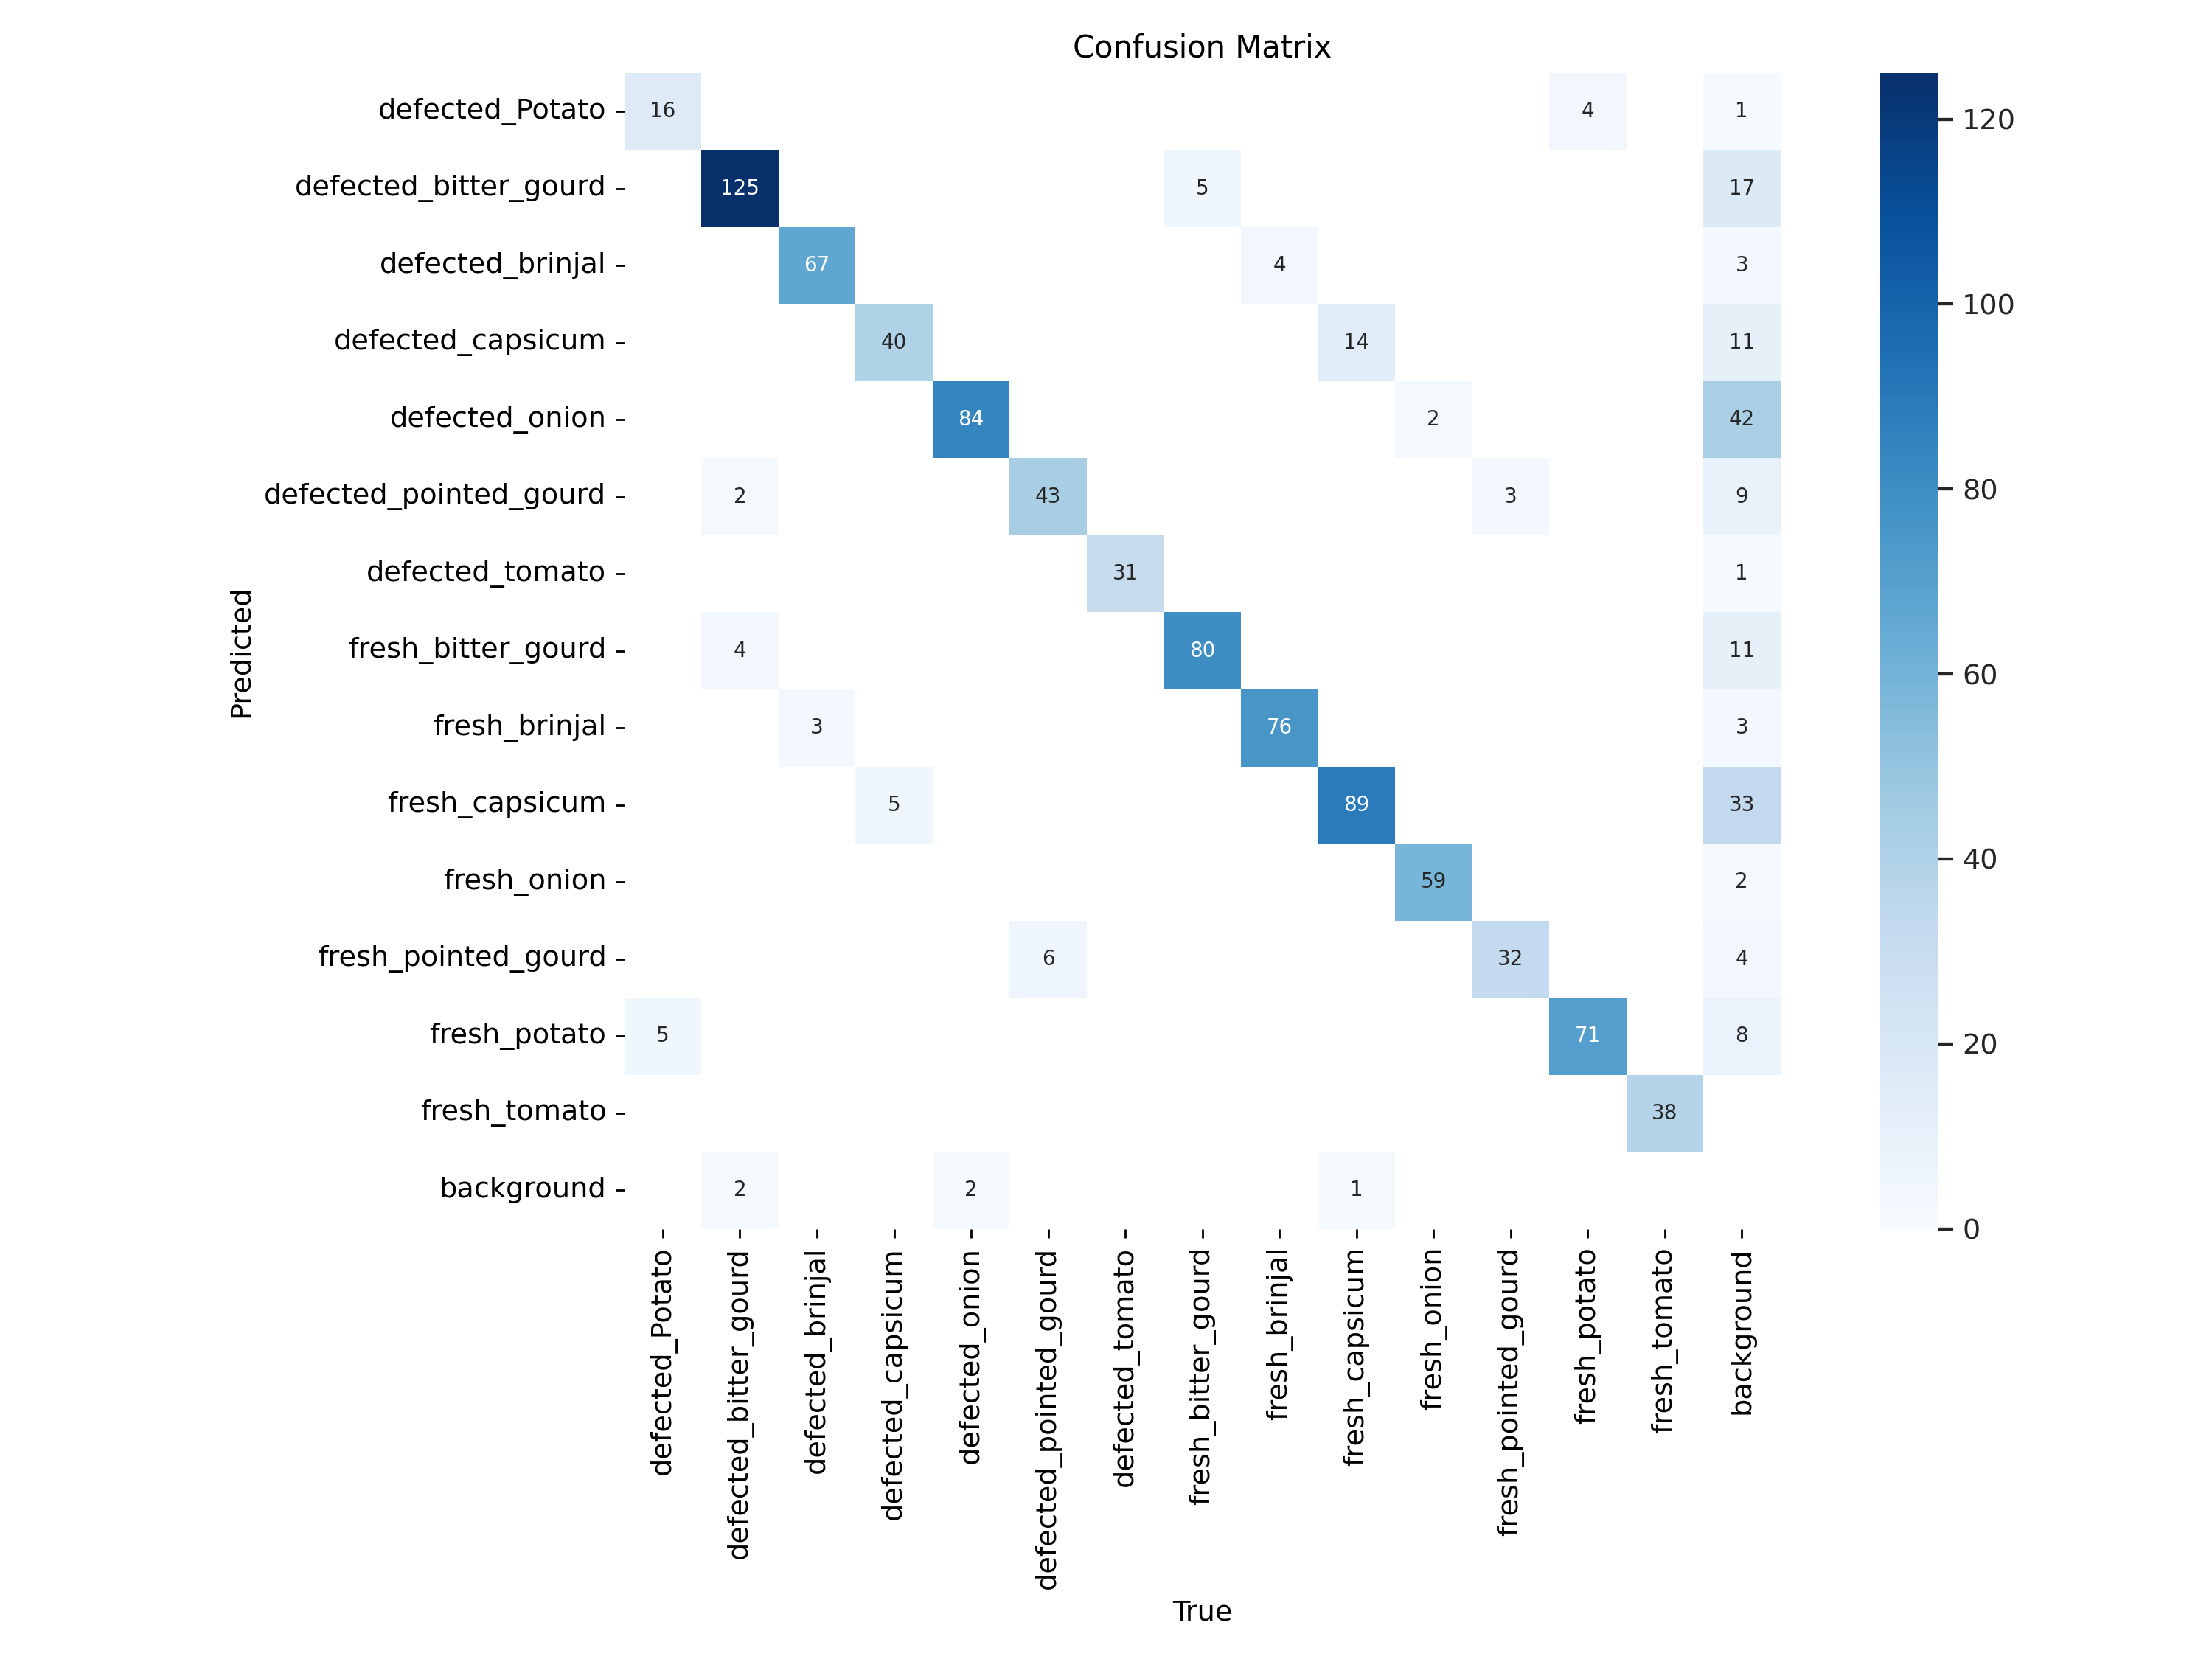

In [7]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

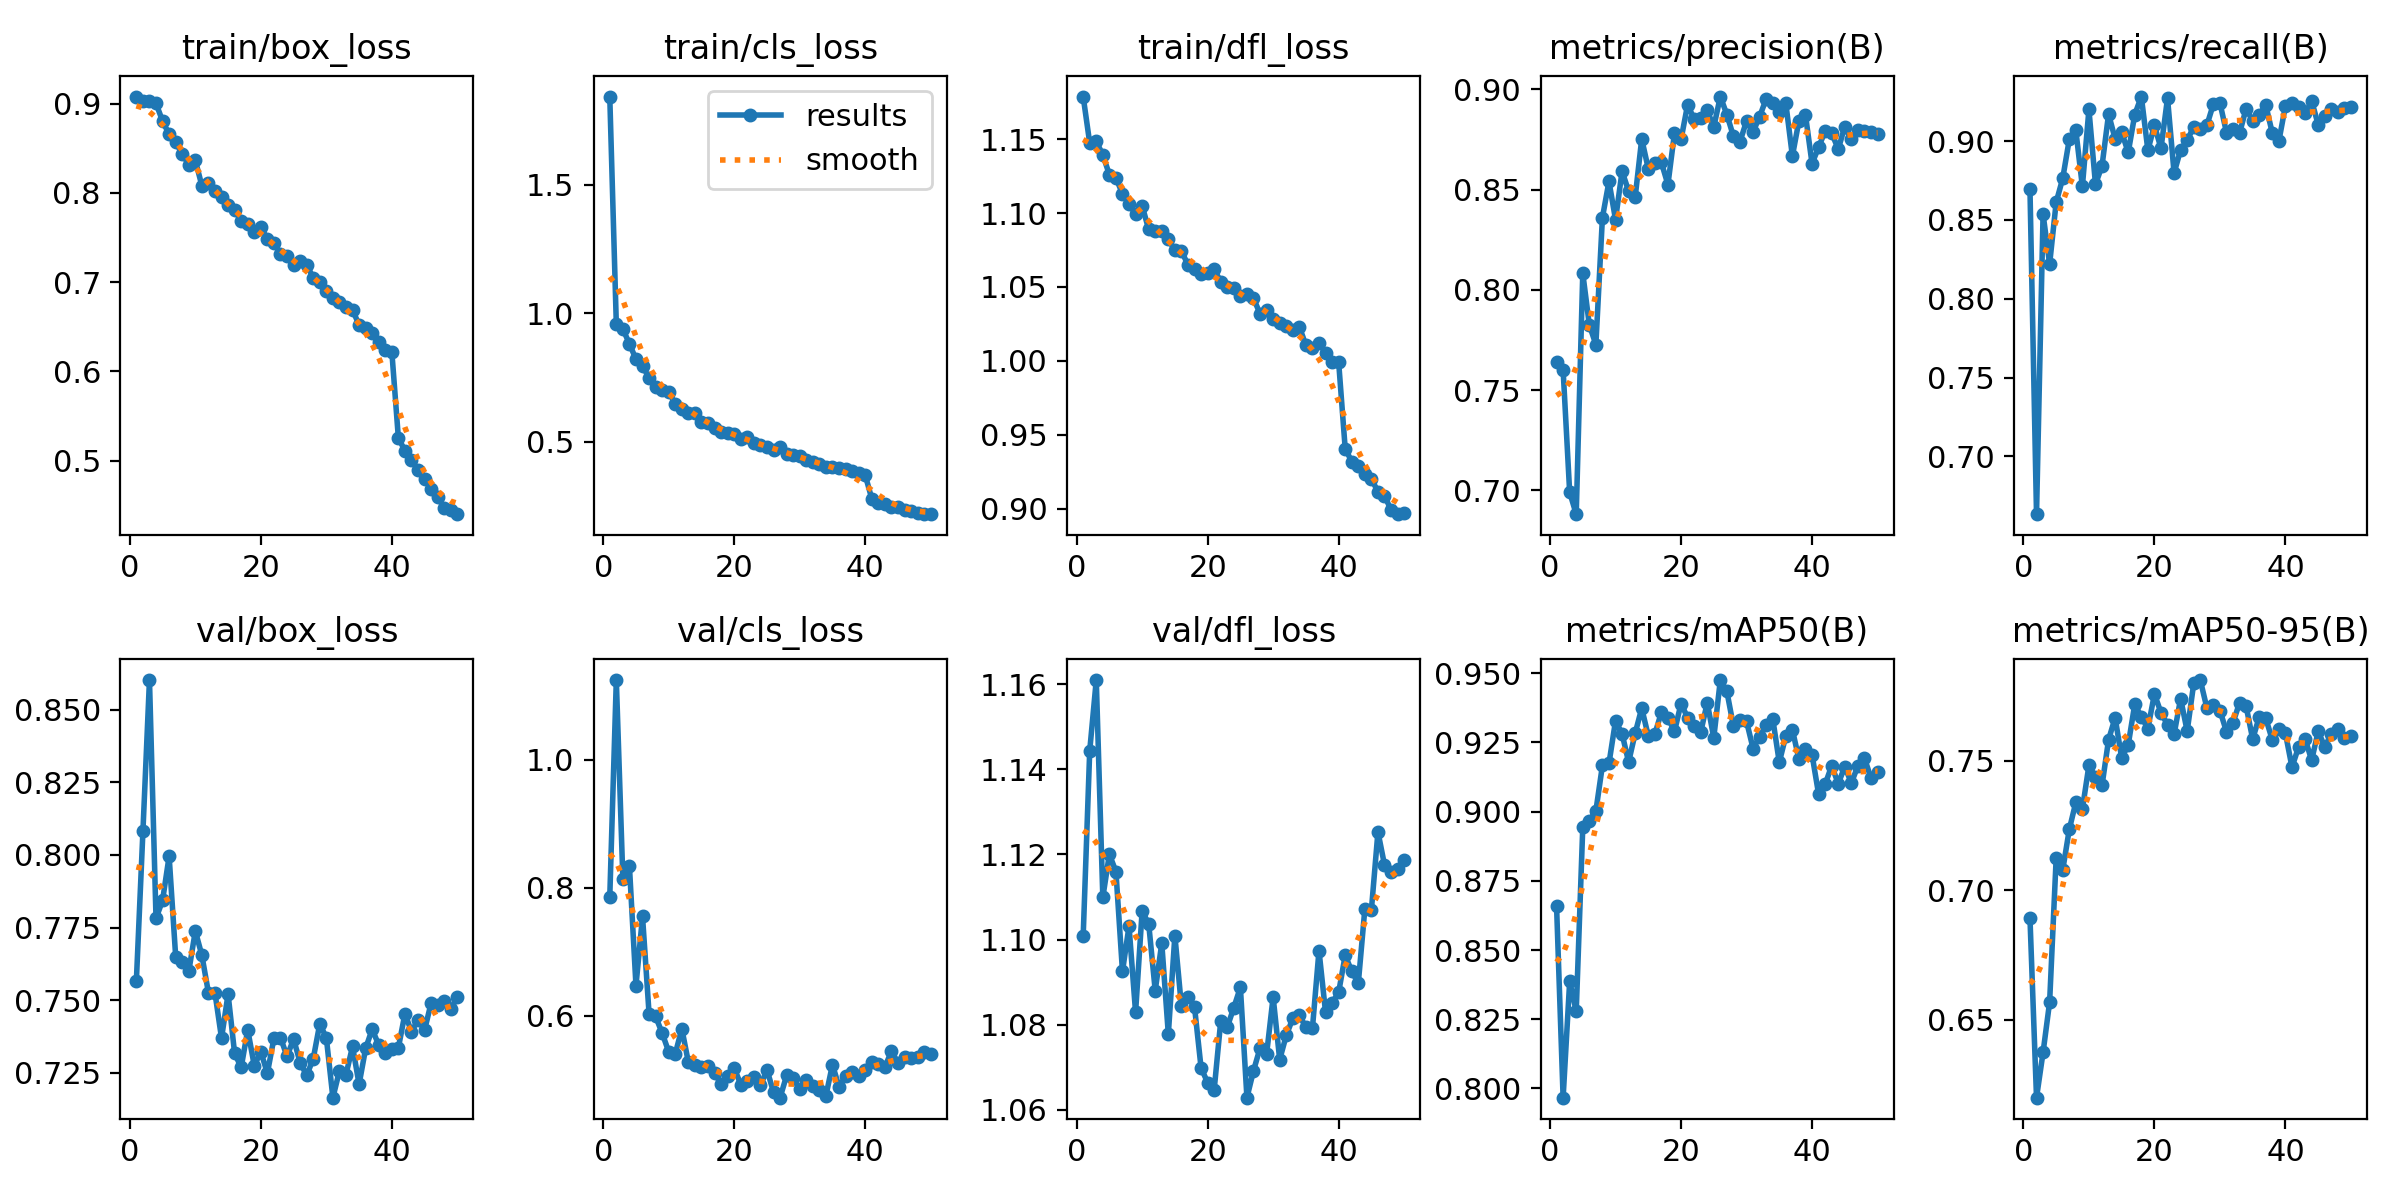

In [8]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

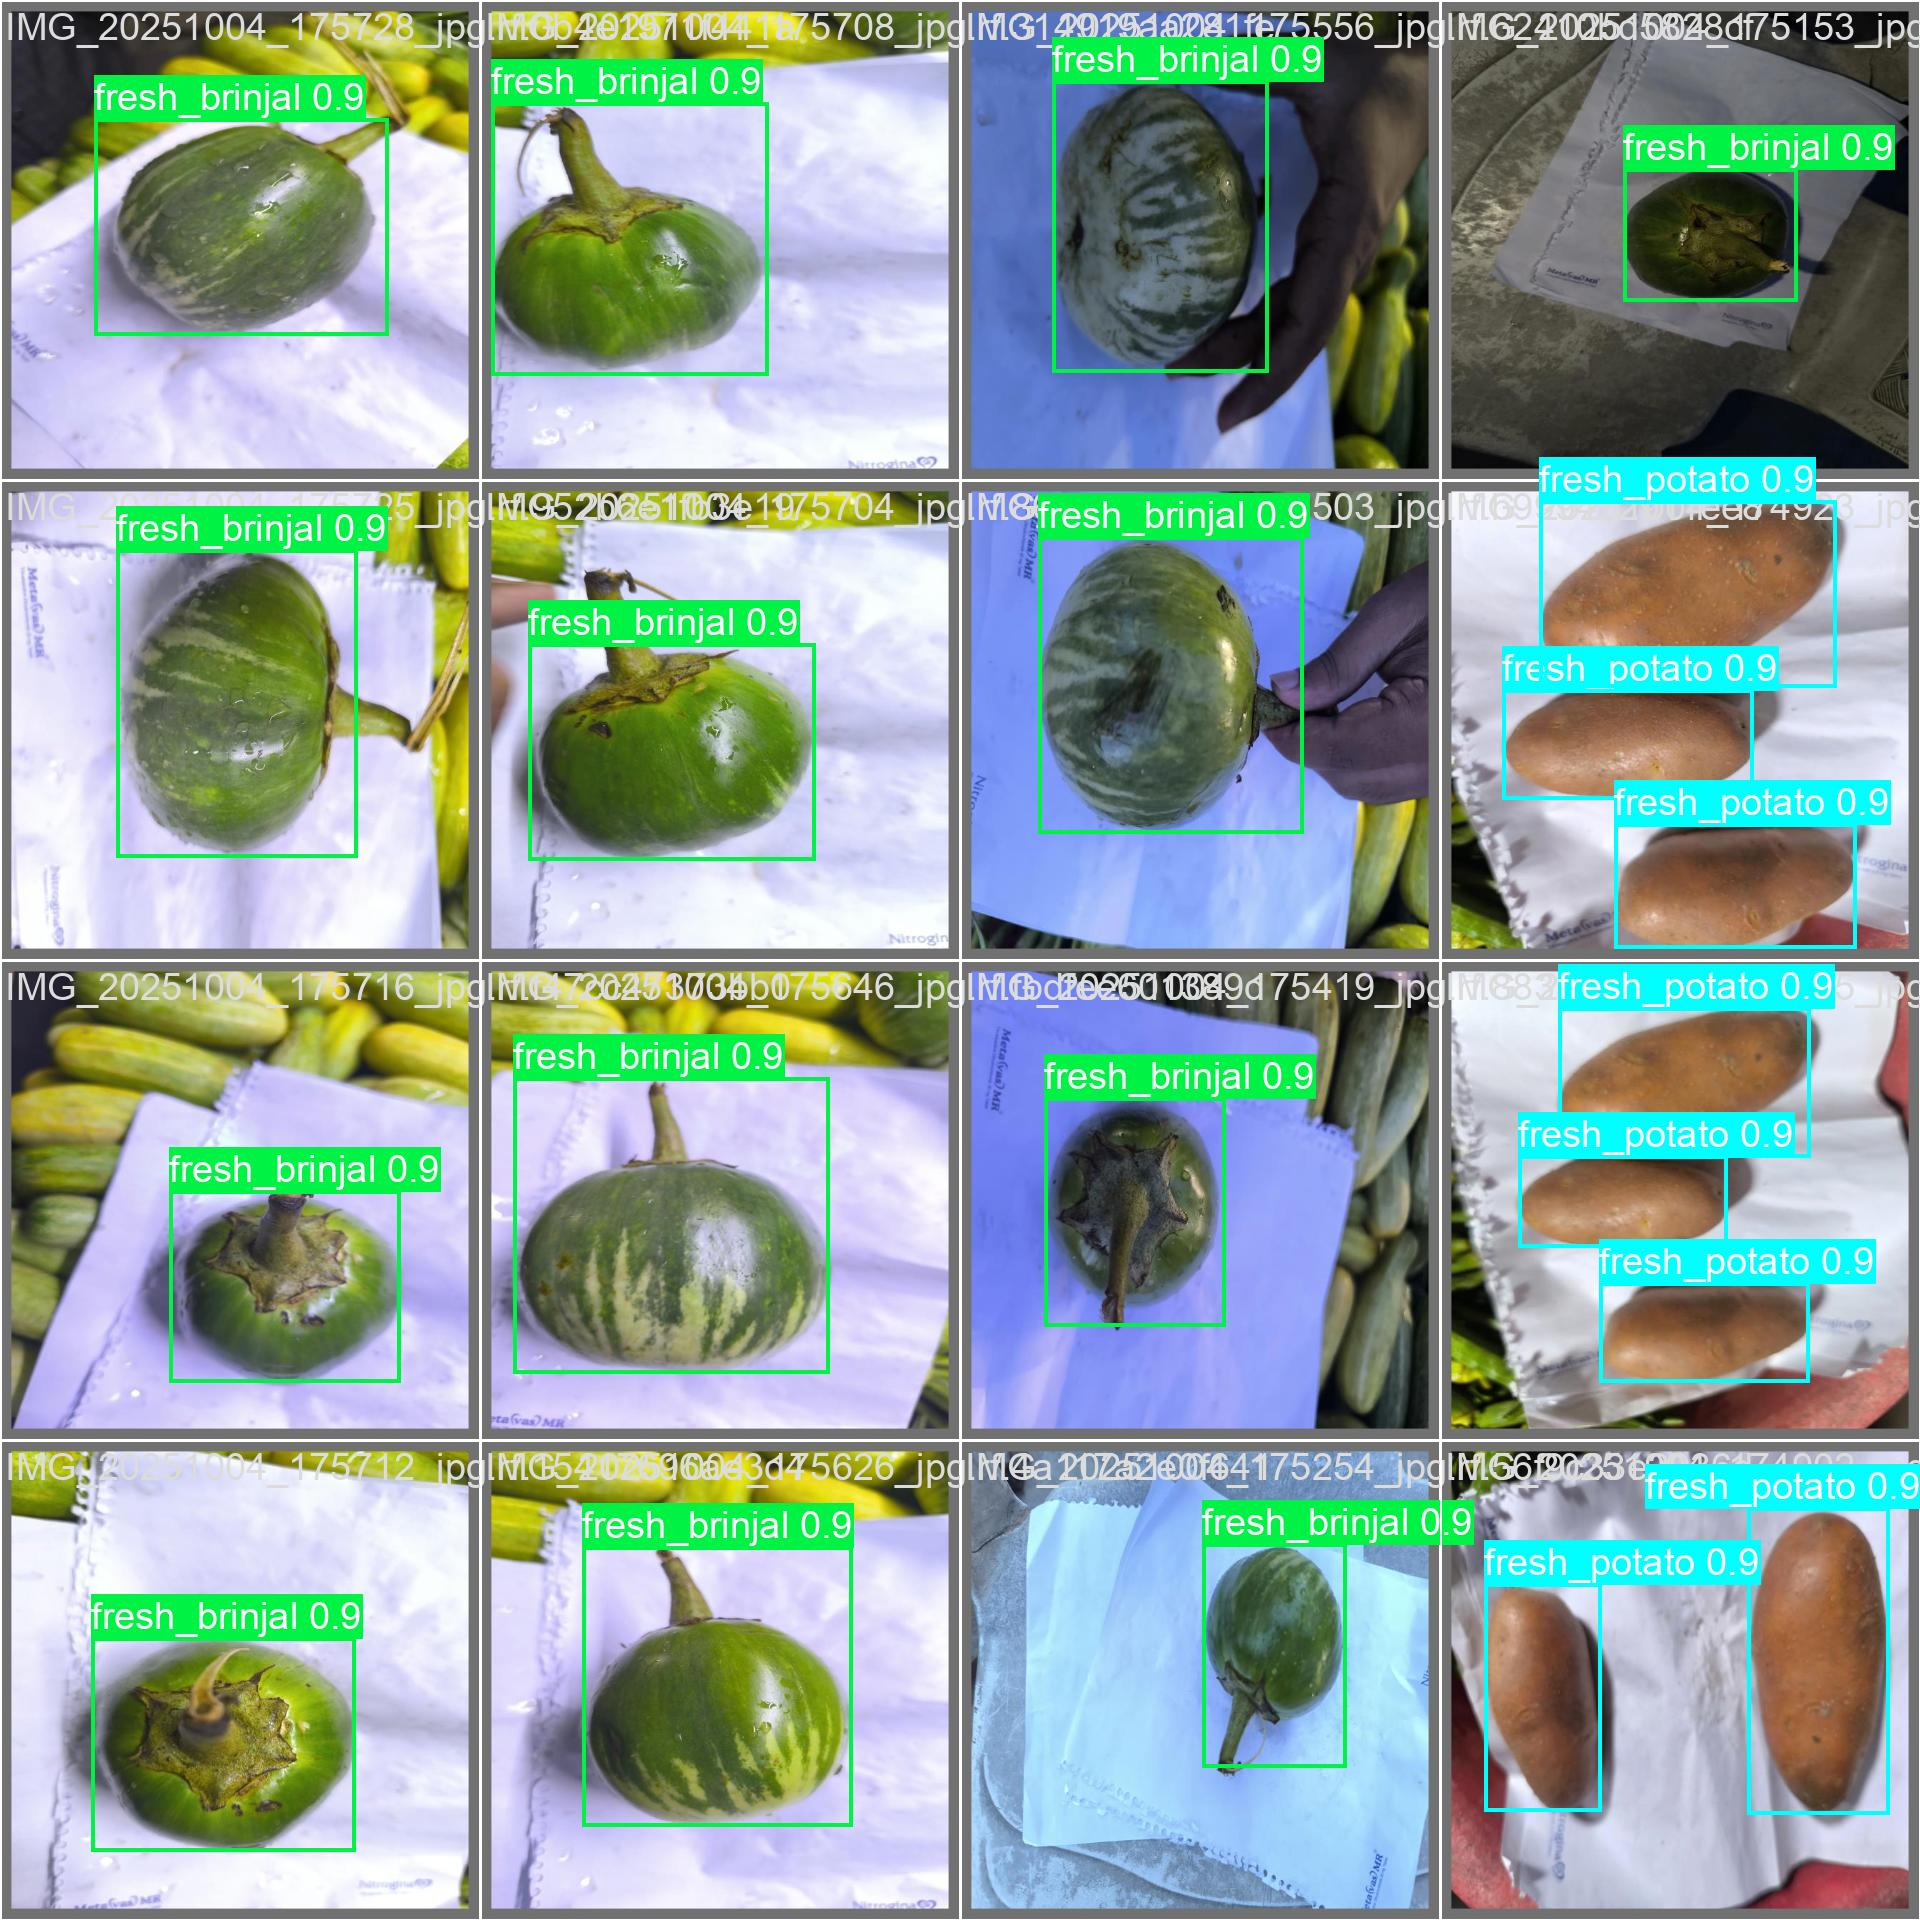

In [9]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [10]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/datasets/VegMining-6/valid/labels.cache... 406 images, 0 backgrounds, 0 corrupt: 100% 406/406 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 26/26 [00:07<00:00,  3.71it/s]
                   all        406        913      0.888      0.906      0.943      0.781
       defected_Potato         17         21      0.768       0.63      0.839      0.694
 defected_bitter_gourd         63        133      0.946      0.932      0.959      0.764
      defected_brinjal         28         70      0.957      0.986      0.992      0.841
     defected_capsicum         25         45      0.674      0.889      0.816      0.704
        defected_onion         12         86      0.777      0.953      0.951      0.699
defected_pointed_gourd         28       

Validation Confusion Matrix

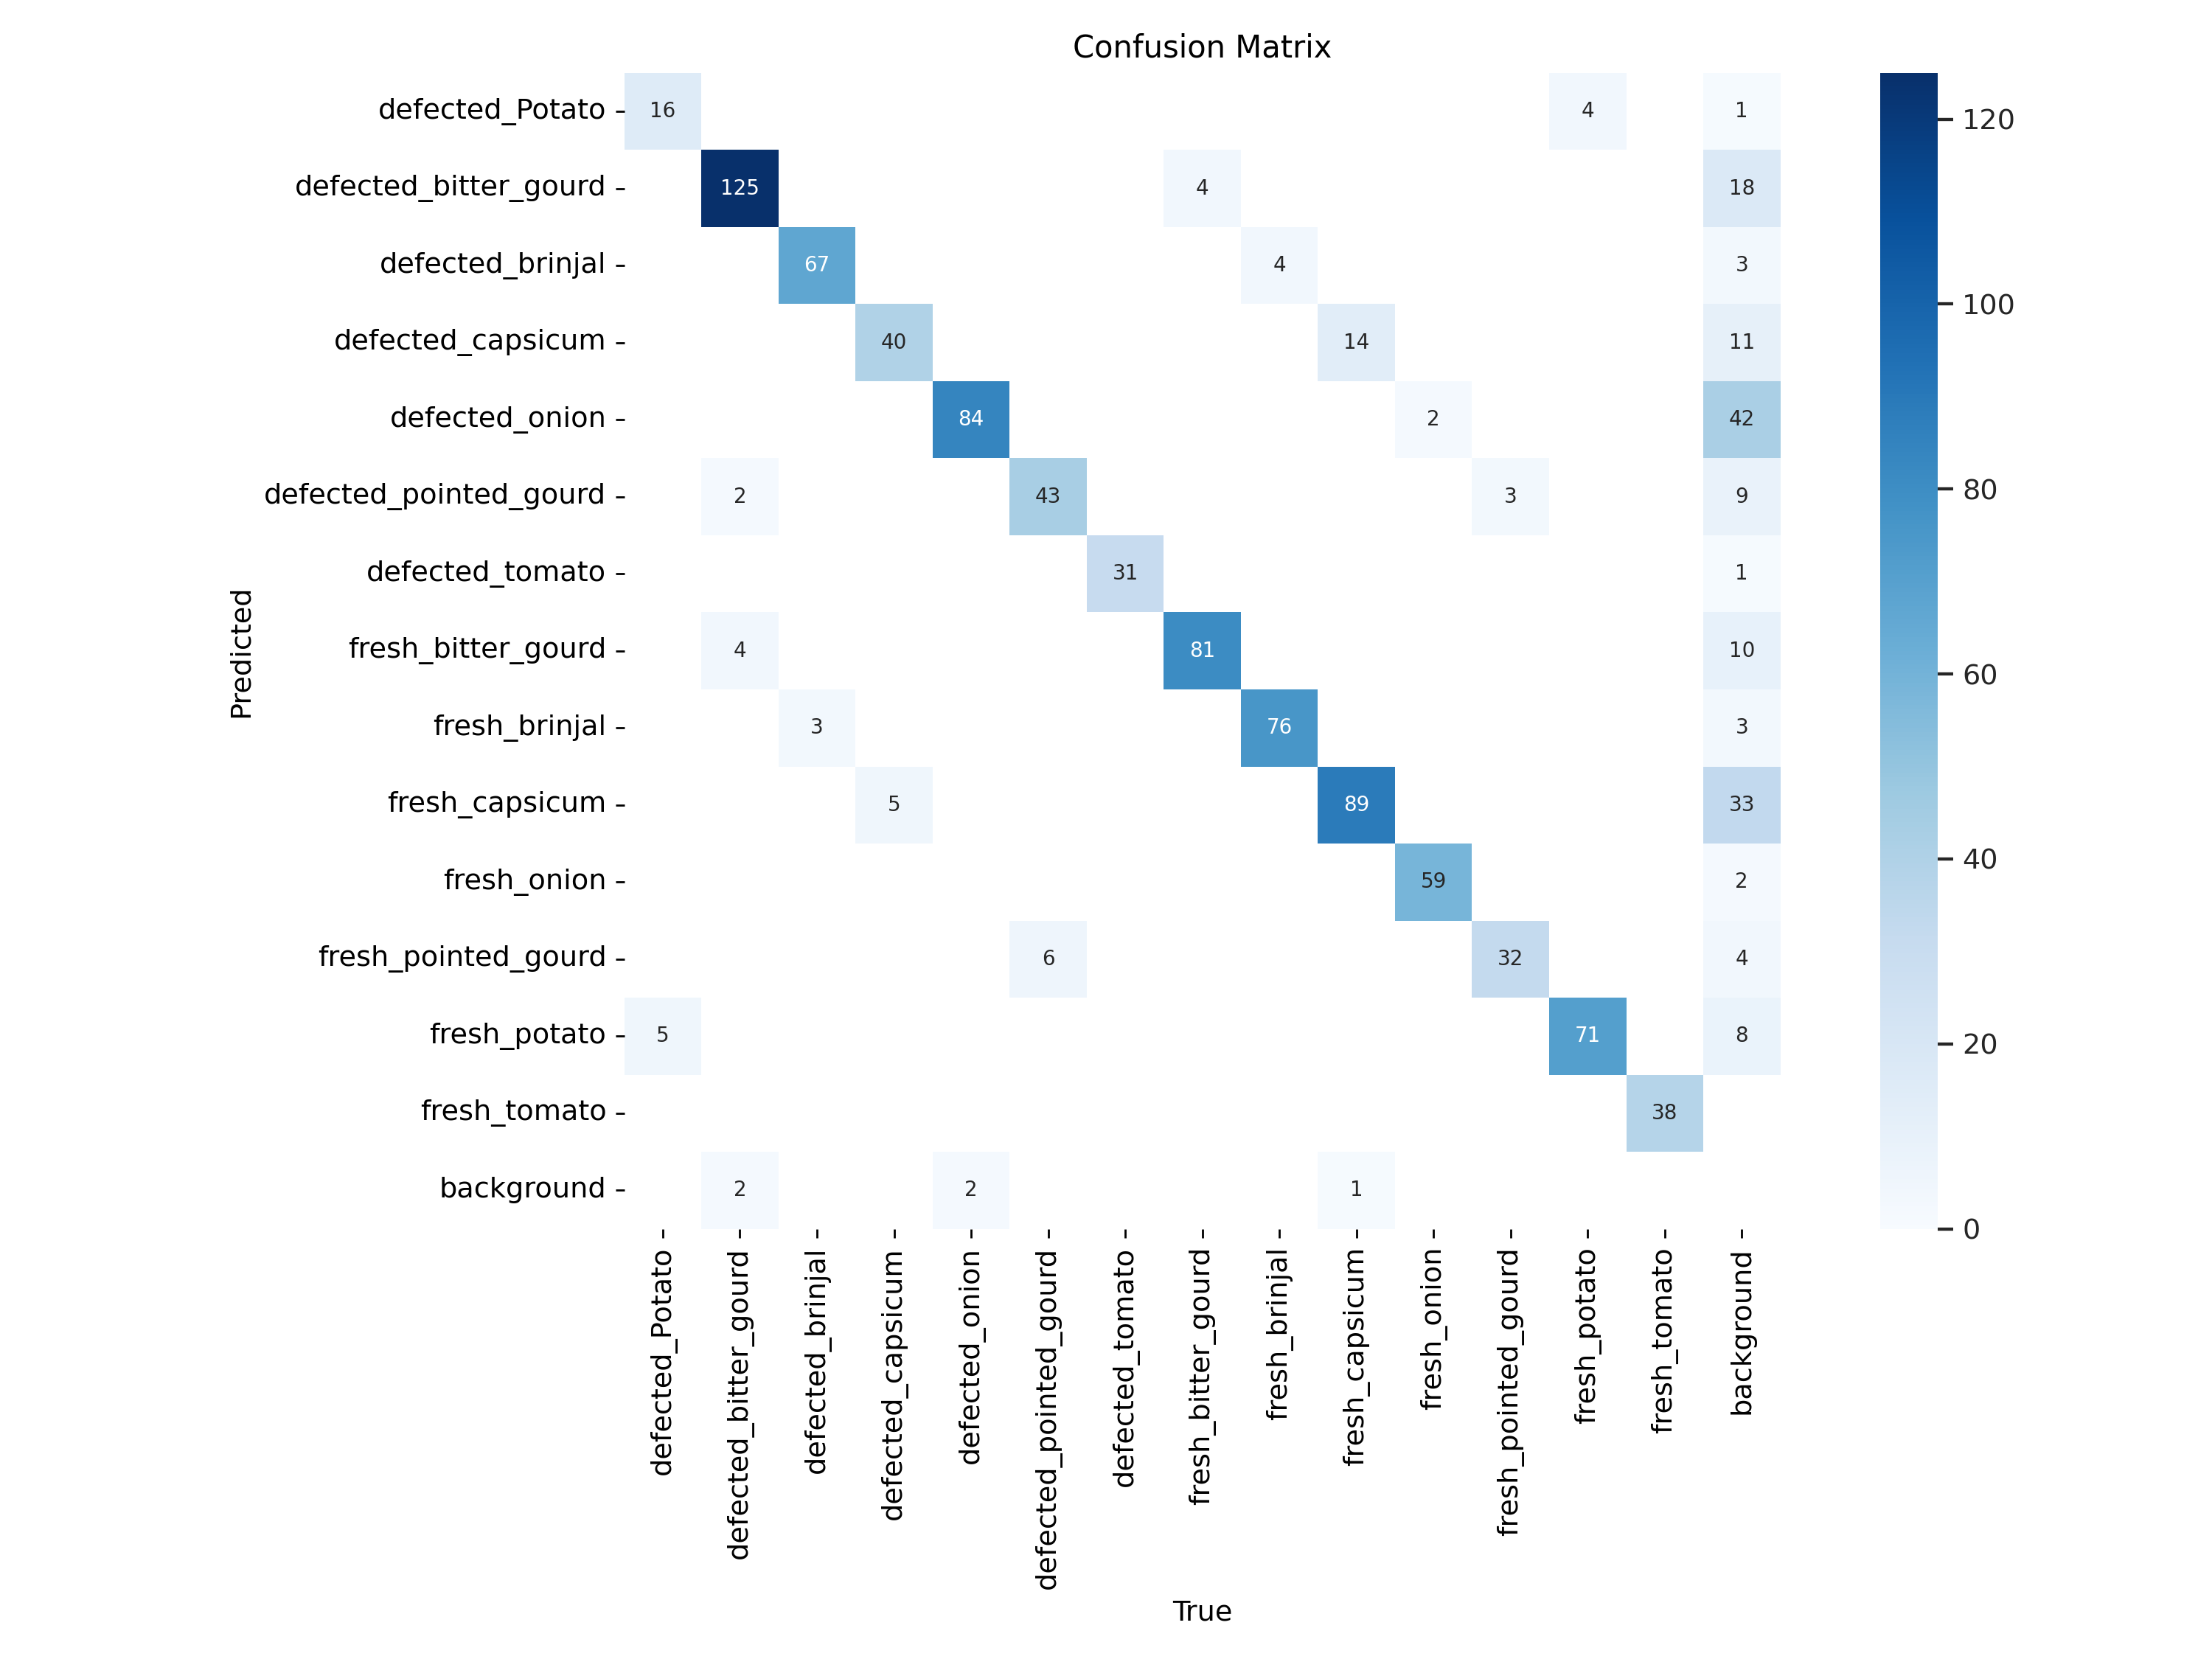

In [11]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/confusion_matrix.png', width=600)

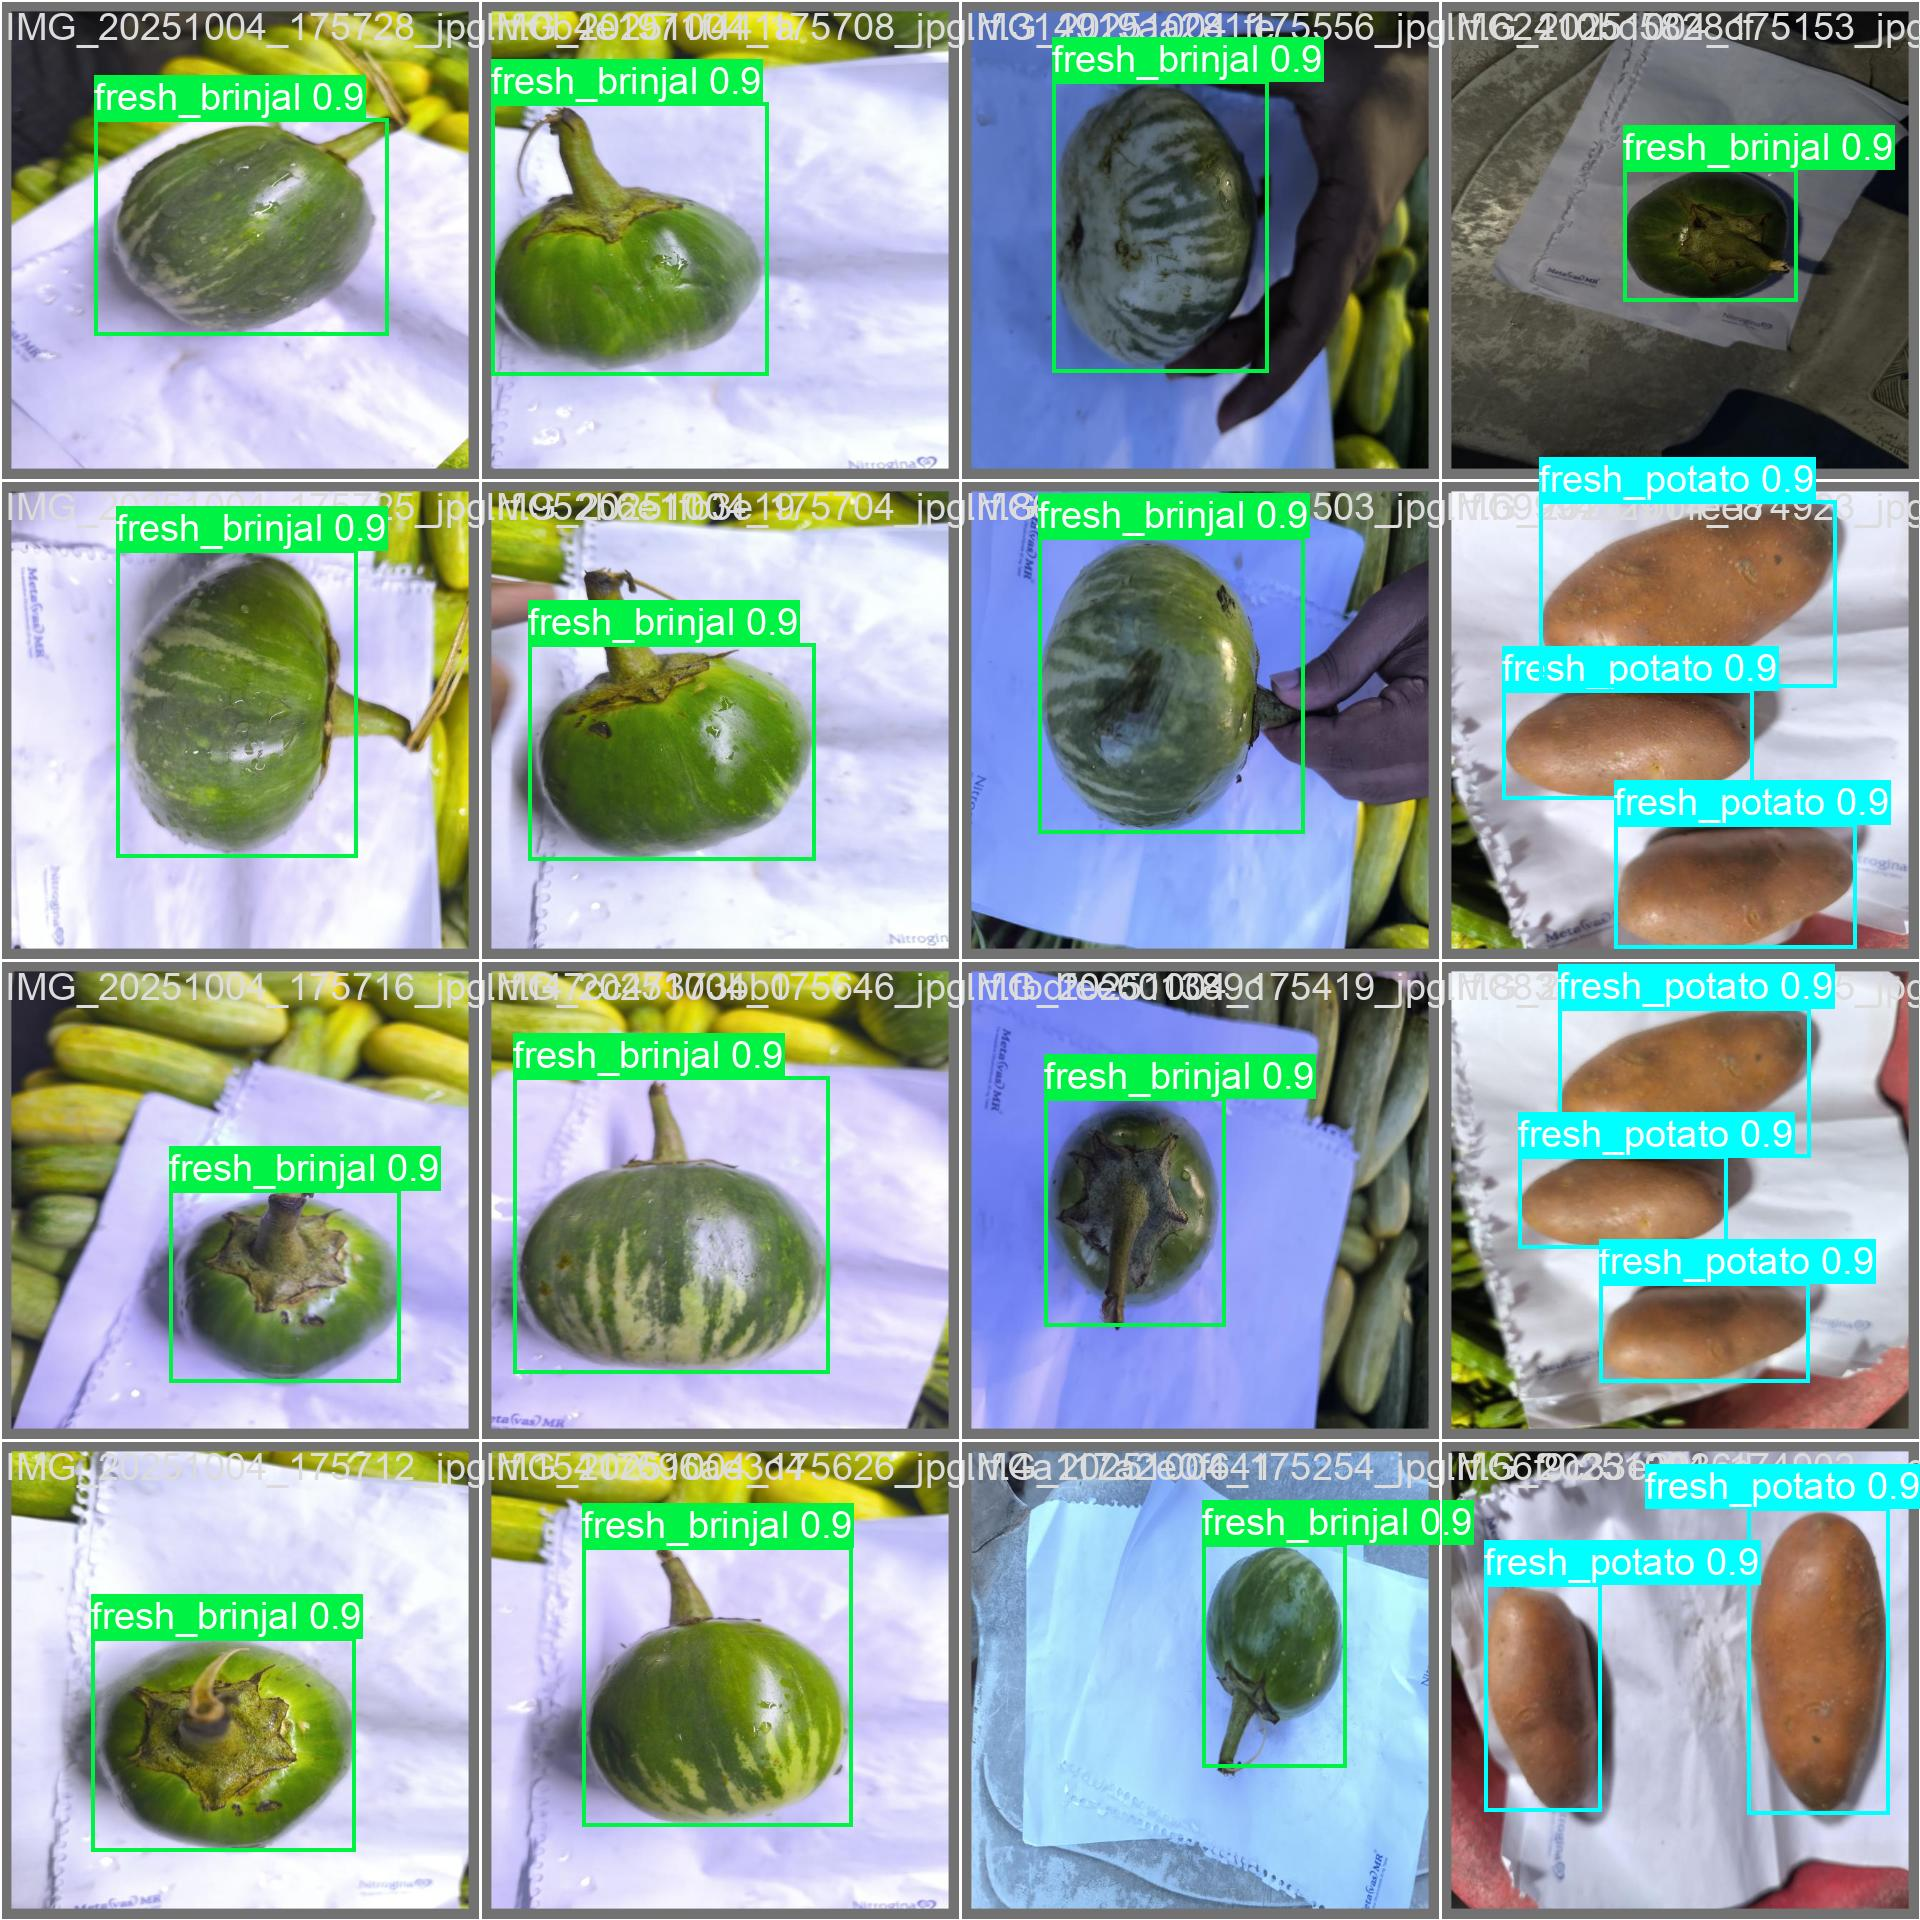

In [12]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/val_batch0_pred.jpg', width=600)

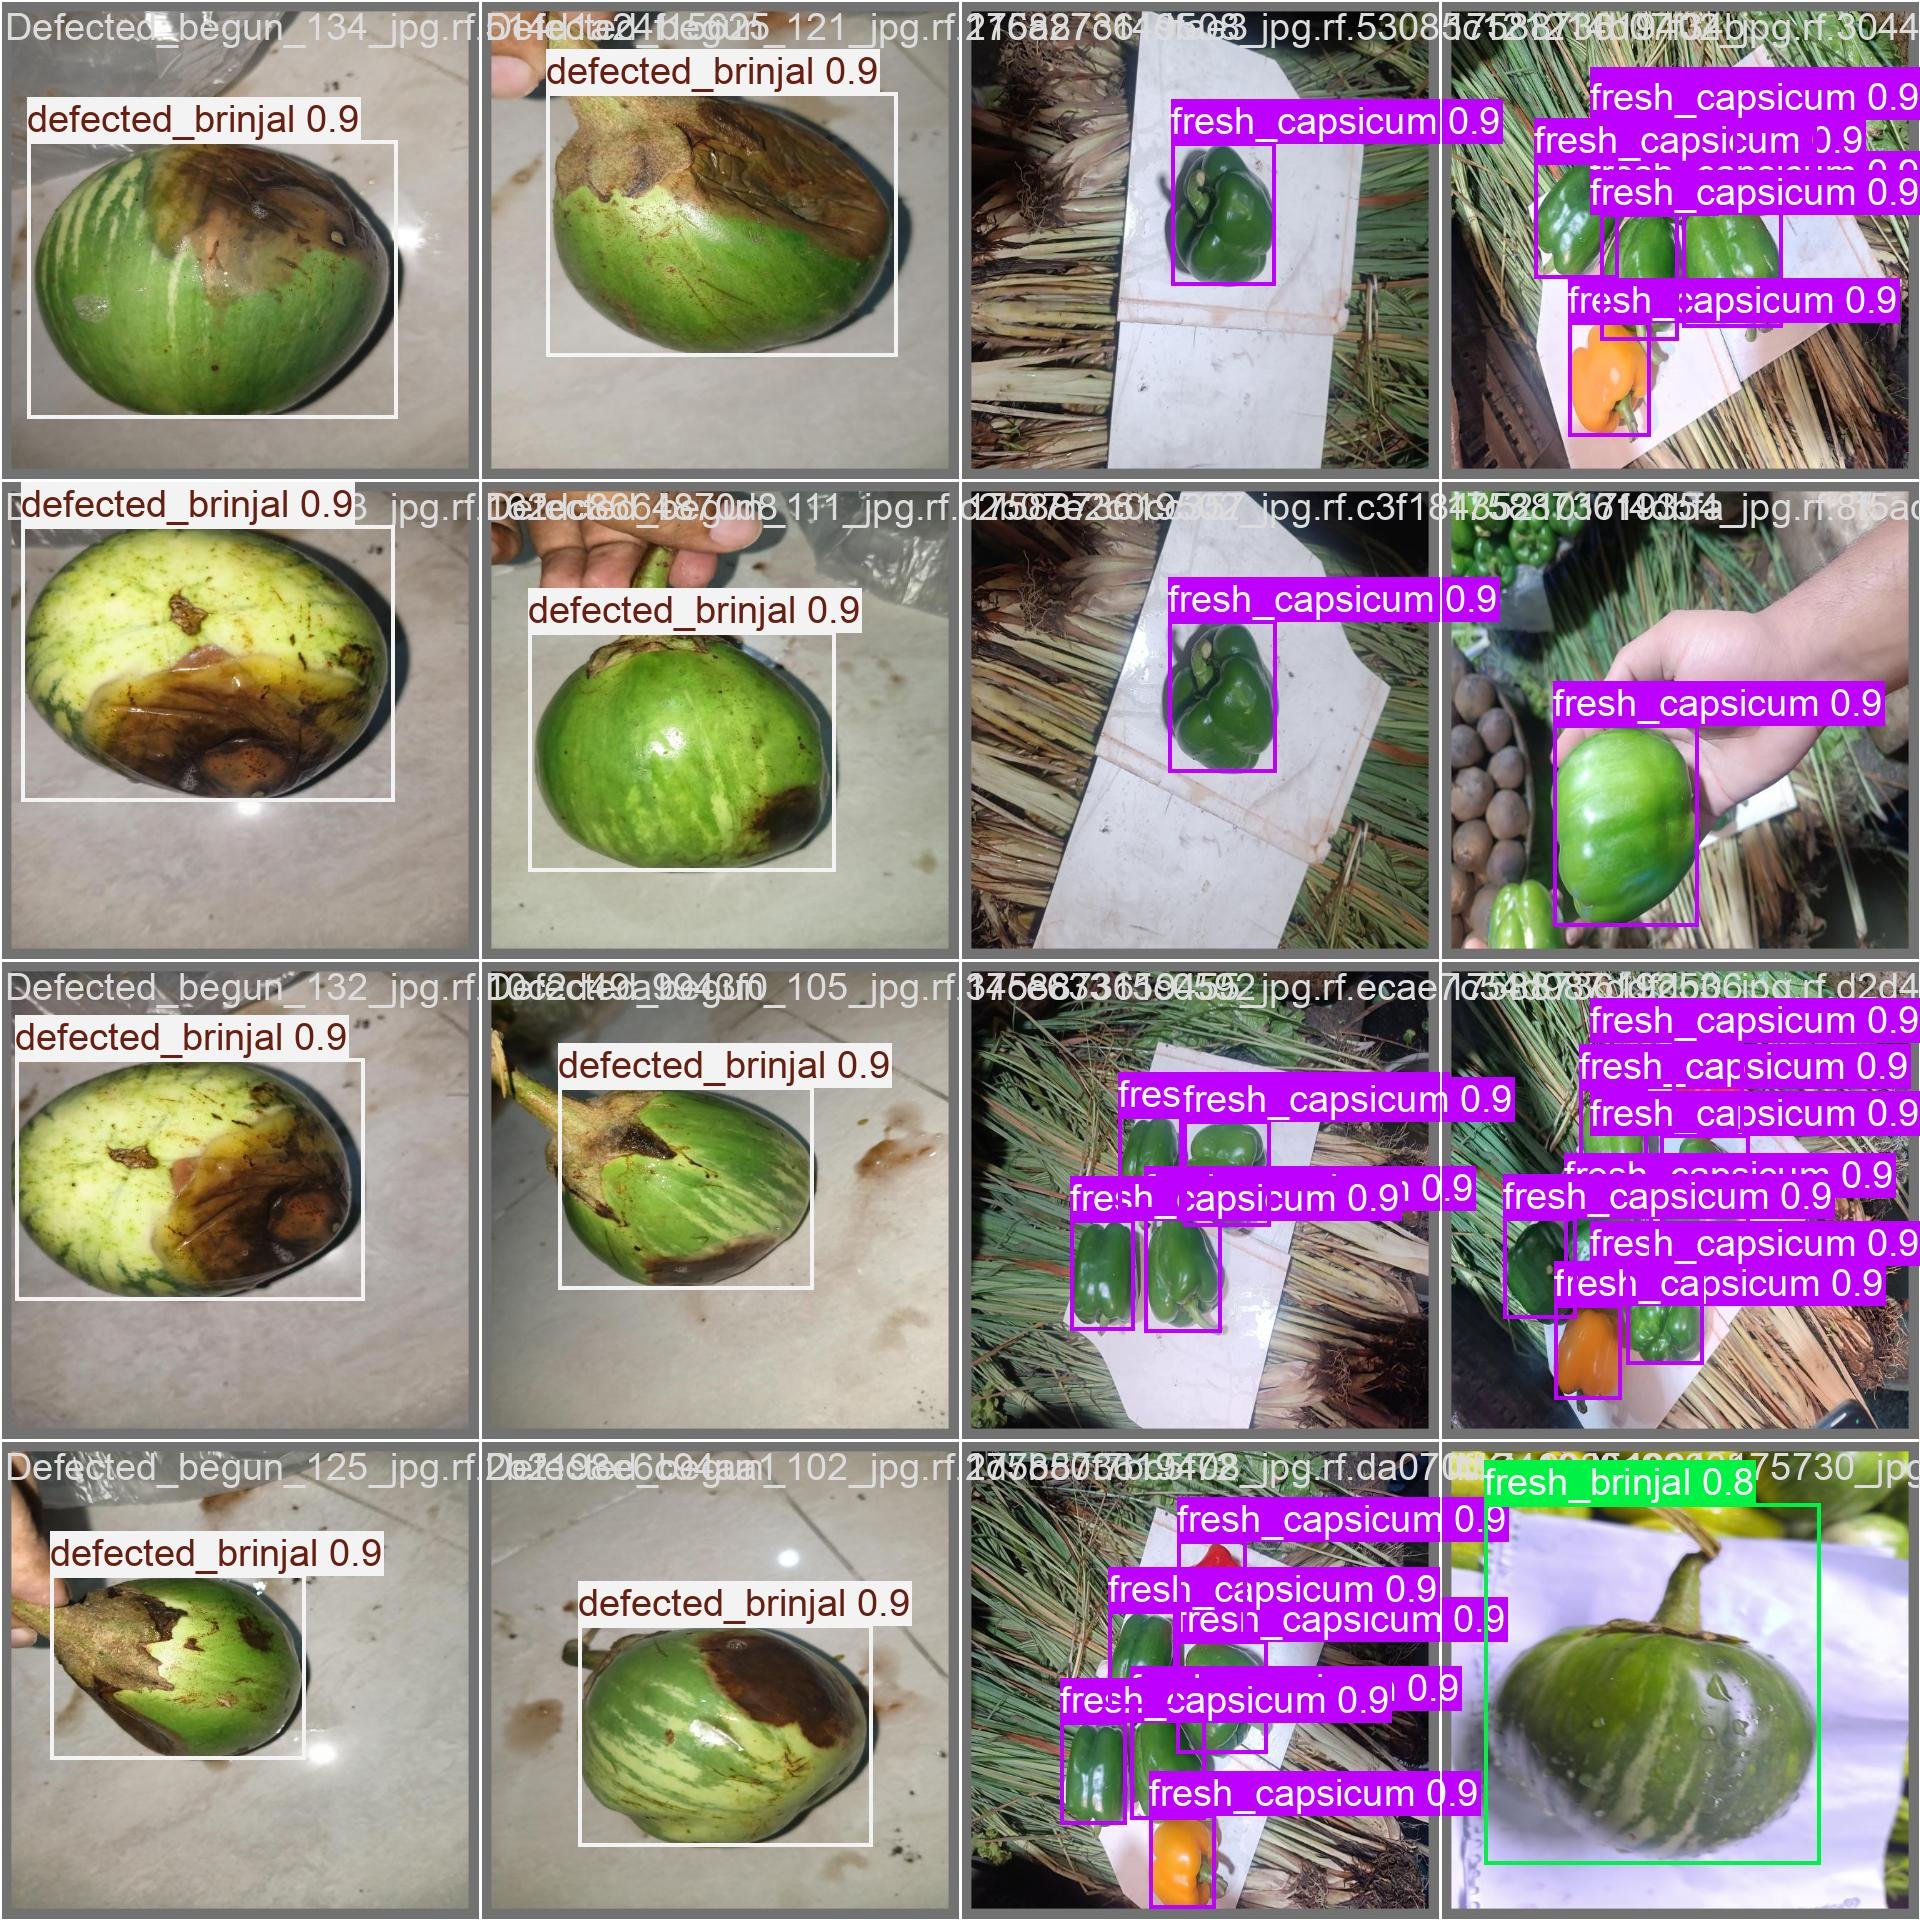

In [13]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/val/val_batch1_pred.jpg', width=600)

## Inference with custom model

In [14]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs

image 1/204 /content/datasets/VegMining-6/test/images/1758873619161_jpg.rf.5eabc632b4480475eea4dc4d197c2a44.jpg: 640x640 3 fresh_capsicums, 15.7ms
image 2/204 /content/datasets/VegMining-6/test/images/1758873619220_jpg.rf.b3667bc641c85b8d1ebd941a90b59cff.jpg: 640x640 7 fresh_capsicums, 15.7ms
image 3/204 /content/datasets/VegMining-6/test/images/1758873619415_jpg.rf.9a86fef93a15be38a79991b5357a128b.jpg: 640x640 6 fresh_capsicums, 15.6ms
image 4/204 /content/datasets/VegMining-6/test/images/Defected_begun_109_jpg.rf.8488c4b0cae5743883f21df133c04054.jpg: 640x640 1 fresh_brinjal, 15.6ms
image 5/204 /content/datasets/VegMining-6/test/images/Defected_begun_112_jpg.rf.724a587680a3723fd5fcee9b03e04b4e.jpg: 640x640 1 defected_brinjal, 15.6ms
image 6/204 /content/datasets/VegMining-6/test/images/Defected_begun_154_jpg.rf.6cb4e791c

**NOTE:** Let's take a look at few results.

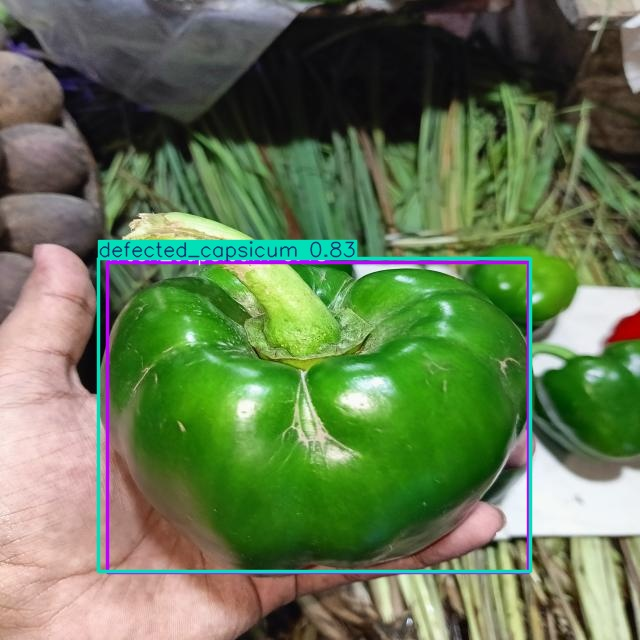

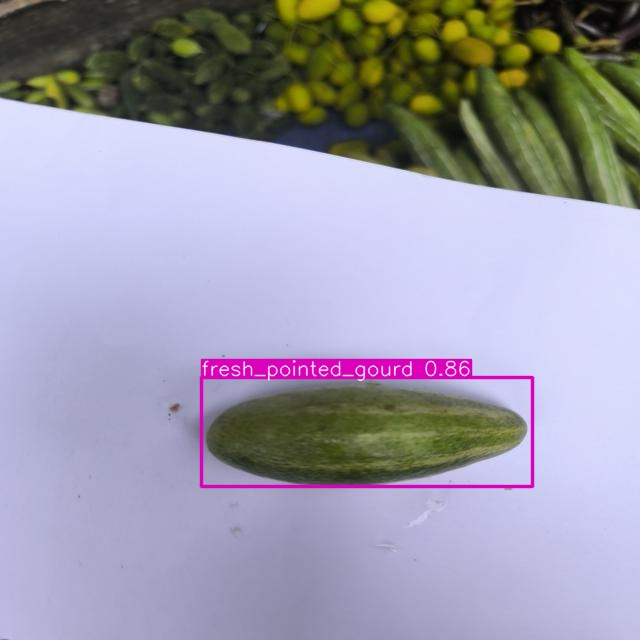

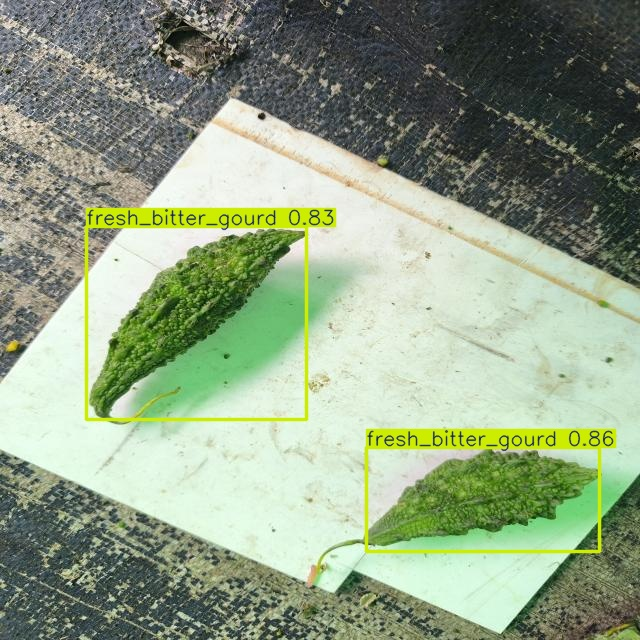

In [15]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob(f'{HOME}/runs/detect/predict*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[48:51]:
    display(IPyImage(filename=img, width=600))
    print("\n")

In [16]:
import shutil

shutil.make_archive("/content/runs/detect", "zip", "/content/runs/detect")


'/content/runs/detect.zip'